## 第二步，广州二手房数据清洗

In [1]:
from pyecharts.globals import CurrentConfig, OnlineHostType
OnlineHostType.NOTEBOOK_HOST='http://localhost:8888/nbextensions/assets/'
CurrentConfig.ONLINE_HOST = OnlineHostType.NOTEBOOK_HOST

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  #pandas自带的图形包
import os
from pyecharts.charts import Pie, Map, Bar, Line, Grid, Page, Funnel, Geo #插件可以绘制很酷炫的图形
from pyecharts import options as opts 
from pyecharts.globals import ThemeType, ChartType, GeoType
import xlwt, xlrd
import csv

# matplotlib可以正常显示汉字
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
# 导入写入的广州二手房数据
df = pd.read_csv(r'./广州二手房源信息.csv')
df

,Unnamed: 0,HouseName,Address,houseInfo,totalPrice,unitPrice,region
0,0,中海誉城北苑,香雪,1室1厅 | 56.38平米 | 东 | 精装 | 中楼层(共33层) | 2012年建 | 塔楼,223.0,39554,黄埔
1,1,中海誉城北苑,香雪,2室2厅 | 87.7平米 | 西南 | 精装 | 低楼层(共33层) | 2012年建 | 塔楼,320.0,36489,黄埔
2,2,中海誉城北苑,香雪,1室1厅 | 56.38平米 | 北 | 精装 | 高楼层(共33层) | 2012年建 | 塔楼,212.0,37602,黄埔
3,3,中海誉城北苑,香雪,3室2厅 | 97.1平米 | 东南 | 精装 | 中楼层(共33层) | 塔楼,375.0,38620,黄埔
4,4,中海誉城北苑,香雪,3室2厅 | 92.45平米 | 东 | 精装 | 高楼层(共33层) | 塔楼,370.0,40022,黄埔
...,...,...,...,...,...,...,...
64939,68620,华仙楼,沙太南,3室2厅 | 91.81平米 | 南 北 | 其他 | 高楼层(共9层) | 1999年建 ...,320.0,34855,越秀
64940,68621,华仙楼,沙太南,1室1厅 | 36.06平米 | 东南 西南 | 精装 | 高楼层(共9层) | 塔楼,115.0,31892,越秀
64941,68622,田美居,同德围,2室1厅 | 73.4平米 | 南 | 简装 | 高楼层(共9层) | 1999年建 | 塔楼,210.0,28611,越秀
64942,68623,田美居,同德围,2室1厅 | 73.5平米 | 南 | 简装 | 高楼层(共9层) | 1999年建 | 塔楼,184.0,25035,越秀


In [3]:
#加入区，方便后面数据处理
df['region'] = df.region + "区"
df

,Unnamed: 0,HouseName,Address,houseInfo,totalPrice,unitPrice,region
0,0,中海誉城北苑,香雪,1室1厅 | 56.38平米 | 东 | 精装 | 中楼层(共33层) | 2012年建 | 塔楼,223.0,39554,黄埔区
1,1,中海誉城北苑,香雪,2室2厅 | 87.7平米 | 西南 | 精装 | 低楼层(共33层) | 2012年建 | 塔楼,320.0,36489,黄埔区
2,2,中海誉城北苑,香雪,1室1厅 | 56.38平米 | 北 | 精装 | 高楼层(共33层) | 2012年建 | 塔楼,212.0,37602,黄埔区
3,3,中海誉城北苑,香雪,3室2厅 | 97.1平米 | 东南 | 精装 | 中楼层(共33层) | 塔楼,375.0,38620,黄埔区
4,4,中海誉城北苑,香雪,3室2厅 | 92.45平米 | 东 | 精装 | 高楼层(共33层) | 塔楼,370.0,40022,黄埔区
...,...,...,...,...,...,...,...
64939,68620,华仙楼,沙太南,3室2厅 | 91.81平米 | 南 北 | 其他 | 高楼层(共9层) | 1999年建 ...,320.0,34855,越秀区
64940,68621,华仙楼,沙太南,1室1厅 | 36.06平米 | 东南 西南 | 精装 | 高楼层(共9层) | 塔楼,115.0,31892,越秀区
64941,68622,田美居,同德围,2室1厅 | 73.4平米 | 南 | 简装 | 高楼层(共9层) | 1999年建 | 塔楼,210.0,28611,越秀区
64942,68623,田美居,同德围,2室1厅 | 73.5平米 | 南 | 简装 | 高楼层(共9层) | 1999年建 | 塔楼,184.0,25035,越秀区


In [4]:
#对houseInfo进行数据处理
df.houseInfo

0        1室1厅 | 56.38平米 | 东 | 精装 | 中楼层(共33层) | 2012年建 | 塔楼
1        2室2厅 | 87.7平米 | 西南 | 精装 | 低楼层(共33层) | 2012年建 | 塔楼
2        1室1厅 | 56.38平米 | 北 | 精装 | 高楼层(共33层) | 2012年建 | 塔楼
3                3室2厅 | 97.1平米 | 东南 | 精装 | 中楼层(共33层)  | 塔楼
4                3室2厅 | 92.45平米 | 东 | 精装 | 高楼层(共33层)  | 塔楼
                               ...                        
64939    3室2厅 | 91.81平米 | 南 北 | 其他 | 高楼层(共9层) | 1999年建 ...
64940         1室1厅 | 36.06平米 | 东南 西南 | 精装 | 高楼层(共9层)  | 塔楼
64941      2室1厅 | 73.4平米 | 南 | 简装 | 高楼层(共9层) | 1999年建 | 塔楼
64942      2室1厅 | 73.5平米 | 南 | 简装 | 高楼层(共9层) | 1999年建 | 塔楼
64943      2室1厅 | 71平米 | 南 北 | 其他 | 高楼层(共9层) | 1999年建 | 塔楼
Name: houseInfo, Length: 64944, dtype: object

In [5]:
#查询有多少车位信息
df[df['houseInfo'].str.split('|').str[0].str.strip() == '车位']

,Unnamed: 0,HouseName,Address,houseInfo,totalPrice,unitPrice,region
71,71,中海誉城北苑,香雪,车位 | 11.7平米 | 南 | 塔楼,12.0,10257,黄埔区
73,73,中海誉城北苑,香雪,车位 | 11.5平米 | 北 | 塔楼,19.0,16522,黄埔区
75,75,中海誉城北苑,香雪,车位 | 11.75平米 | 东 | 塔楼,12.3,10469,黄埔区
77,77,中海誉城北苑,香雪,车位 | 12平米 | 北 | 塔楼,20.0,16667,黄埔区
78,78,中海誉城北苑,香雪,车位 | 11.8平米 | 北 | 塔楼,12.0,10170,黄埔区
...,...,...,...,...,...,...,...
64457,68137,岭南公馆,新区,车位 | 11.5平米 | 南 | 塔楼,28.0,24348,增城区
64591,68271,金汇大厦,解放南,车位 | 11.7平米 | 南 | 平房,45.0,38462,增城区
64642,68322,现代广场家信商业中心,工业大道北,车位 | 11.85平米 | 西 | 塔楼,45.0,37975,花都区
64764,68445,阳光雅居,旧区,车位 | 12.47平米 | 南 | 塔楼,8.8,7057,越秀区


In [6]:
#去除爬取到的车位的数据
df = df.drop(index=(df.loc[(df['houseInfo'].str.split('|').str[0].str.strip() == '车位')].index))
df

,Unnamed: 0,HouseName,Address,houseInfo,totalPrice,unitPrice,region
0,0,中海誉城北苑,香雪,1室1厅 | 56.38平米 | 东 | 精装 | 中楼层(共33层) | 2012年建 | 塔楼,223.0,39554,黄埔区
1,1,中海誉城北苑,香雪,2室2厅 | 87.7平米 | 西南 | 精装 | 低楼层(共33层) | 2012年建 | 塔楼,320.0,36489,黄埔区
2,2,中海誉城北苑,香雪,1室1厅 | 56.38平米 | 北 | 精装 | 高楼层(共33层) | 2012年建 | 塔楼,212.0,37602,黄埔区
3,3,中海誉城北苑,香雪,3室2厅 | 97.1平米 | 东南 | 精装 | 中楼层(共33层) | 塔楼,375.0,38620,黄埔区
4,4,中海誉城北苑,香雪,3室2厅 | 92.45平米 | 东 | 精装 | 高楼层(共33层) | 塔楼,370.0,40022,黄埔区
...,...,...,...,...,...,...,...
64939,68620,华仙楼,沙太南,3室2厅 | 91.81平米 | 南 北 | 其他 | 高楼层(共9层) | 1999年建 ...,320.0,34855,越秀区
64940,68621,华仙楼,沙太南,1室1厅 | 36.06平米 | 东南 西南 | 精装 | 高楼层(共9层) | 塔楼,115.0,31892,越秀区
64941,68622,田美居,同德围,2室1厅 | 73.4平米 | 南 | 简装 | 高楼层(共9层) | 1999年建 | 塔楼,210.0,28611,越秀区
64942,68623,田美居,同德围,2室1厅 | 73.5平米 | 南 | 简装 | 高楼层(共9层) | 1999年建 | 塔楼,184.0,25035,越秀区


In [7]:
#对houseInfo列进行数据处理
df.houseInfo

0        1室1厅 | 56.38平米 | 东 | 精装 | 中楼层(共33层) | 2012年建 | 塔楼
1        2室2厅 | 87.7平米 | 西南 | 精装 | 低楼层(共33层) | 2012年建 | 塔楼
2        1室1厅 | 56.38平米 | 北 | 精装 | 高楼层(共33层) | 2012年建 | 塔楼
3                3室2厅 | 97.1平米 | 东南 | 精装 | 中楼层(共33层)  | 塔楼
4                3室2厅 | 92.45平米 | 东 | 精装 | 高楼层(共33层)  | 塔楼
                               ...                        
64939    3室2厅 | 91.81平米 | 南 北 | 其他 | 高楼层(共9层) | 1999年建 ...
64940         1室1厅 | 36.06平米 | 东南 西南 | 精装 | 高楼层(共9层)  | 塔楼
64941      2室1厅 | 73.4平米 | 南 | 简装 | 高楼层(共9层) | 1999年建 | 塔楼
64942      2室1厅 | 73.5平米 | 南 | 简装 | 高楼层(共9层) | 1999年建 | 塔楼
64943      2室1厅 | 71平米 | 南 北 | 其他 | 高楼层(共9层) | 1999年建 | 塔楼
Name: houseInfo, Length: 62843, dtype: object

In [8]:
#获取楼盘户型
df['Type'] = df['houseInfo'].str.split('|').str[0]
df.Type

0        1室1厅 
1        2室2厅 
2        1室1厅 
3        3室2厅 
4        3室2厅 
         ...  
64939    3室2厅 
64940    1室1厅 
64941    2室1厅 
64942    2室1厅 
64943    2室1厅 
Name: Type, Length: 62843, dtype: object

In [9]:
#获取建筑面积
df['area'] = df['houseInfo'].str.split('|').str[1].str.extract(r'(\d+.*\d+)平米')
df.area

0        56.38
1         87.7
2        56.38
3         97.1
4        92.45
         ...  
64939    91.81
64940    36.06
64941     73.4
64942     73.5
64943       71
Name: area, Length: 62843, dtype: object

In [10]:
#获取朝向
df['direction'] = df['houseInfo'].str.split('|').str[2]
df.direction

0             东 
1            西南 
2             北 
3            东南 
4             东 
          ...   
64939       南 北 
64940     东南 西南 
64941         南 
64942         南 
64943       南 北 
Name: direction, Length: 62843, dtype: object

In [11]:
#获取装修类型
df['dectype'] = df['houseInfo'].str.split('|').str[3]
df.dectype

0         精装 
1         精装 
2         精装 
3         精装 
4         精装 
         ... 
64939     其他 
64940     精装 
64941     简装 
64942     简装 
64943     其他 
Name: dectype, Length: 62843, dtype: object

In [12]:
#获取楼层
df['floor'] = df['houseInfo'].str.split('|').str[4]
df.floor

0          中楼层(共33层) 
1          低楼层(共33层) 
2          高楼层(共33层) 
3         中楼层(共33层)  
4         高楼层(共33层)  
             ...     
64939       高楼层(共9层) 
64940      高楼层(共9层)  
64941       高楼层(共9层) 
64942       高楼层(共9层) 
64943       高楼层(共9层) 
Name: floor, Length: 62843, dtype: object

In [13]:
#获取建筑年份
df['year'] = df['houseInfo'].str.split('|').str[5].str.extract(r'(\d+.)年建')
df.year

0        2012
1        2012
2        2012
3         NaN
4         NaN
         ... 
64939    1999
64940     NaN
64941    1999
64942    1999
64943    1999
Name: year, Length: 62843, dtype: object

In [14]:
#获取板塔
df['banta'] = df['houseInfo'].str.split('|').str[-1]
df.banta

0         塔楼
1         塔楼
2         塔楼
3         塔楼
4         塔楼
        ... 
64939     塔楼
64940     塔楼
64941     塔楼
64942     塔楼
64943     塔楼
Name: banta, Length: 62843, dtype: object

In [15]:
#删除houseInfo列
df = df.drop('houseInfo', axis = 1)
df

,Unnamed: 0,HouseName,Address,totalPrice,unitPrice,region,Type,area,direction,dectype,floor,year,banta
0,0,中海誉城北苑,香雪,223.0,39554,黄埔区,1室1厅,56.38,东,精装,中楼层(共33层),2012,塔楼
1,1,中海誉城北苑,香雪,320.0,36489,黄埔区,2室2厅,87.7,西南,精装,低楼层(共33层),2012,塔楼
2,2,中海誉城北苑,香雪,212.0,37602,黄埔区,1室1厅,56.38,北,精装,高楼层(共33层),2012,塔楼
3,3,中海誉城北苑,香雪,375.0,38620,黄埔区,3室2厅,97.1,东南,精装,中楼层(共33层),NaN,塔楼
4,4,中海誉城北苑,香雪,370.0,40022,黄埔区,3室2厅,92.45,东,精装,高楼层(共33层),NaN,塔楼
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64939,68620,华仙楼,沙太南,320.0,34855,越秀区,3室2厅,91.81,南 北,其他,高楼层(共9层),1999,塔楼
64940,68621,华仙楼,沙太南,115.0,31892,越秀区,1室1厅,36.06,东南 西南,精装,高楼层(共9层),NaN,塔楼
64941,68622,田美居,同德围,210.0,28611,越秀区,2室1厅,73.4,南,简装,高楼层(共9层),1999,塔楼
64942,68623,田美居,同德围,184.0,25035,越秀区,2室1厅,73.5,南,简装,高楼层(共9层),1999,塔楼


In [16]:
#查看空值
df.isnull().sum()

Unnamed: 0        0
HouseName         0
Address           0
totalPrice        0
unitPrice         0
region            0
Type              0
area              0
direction         0
dectype           0
floor             0
year          12143
banta             0
dtype: int64

In [17]:
#删除空值
df = df.dropna()
df

,Unnamed: 0,HouseName,Address,totalPrice,unitPrice,region,Type,area,direction,dectype,floor,year,banta
0,0,中海誉城北苑,香雪,223.0,39554,黄埔区,1室1厅,56.38,东,精装,中楼层(共33层),2012,塔楼
1,1,中海誉城北苑,香雪,320.0,36489,黄埔区,2室2厅,87.7,西南,精装,低楼层(共33层),2012,塔楼
2,2,中海誉城北苑,香雪,212.0,37602,黄埔区,1室1厅,56.38,北,精装,高楼层(共33层),2012,塔楼
5,5,中海誉城北苑,香雪,210.0,37254,黄埔区,1室1厅,56.37,东北,精装,中楼层(共21层),2013,塔楼
6,6,中海誉城北苑,香雪,446.0,36489,黄埔区,3室1厅,122.23,南,精装,低楼层(共33层),2015,塔楼
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64938,68619,华仙楼,沙太南,275.0,29954,越秀区,3室2厅,91.81,东南,简装,中楼层(共9层),1999,塔楼
64939,68620,华仙楼,沙太南,320.0,34855,越秀区,3室2厅,91.81,南 北,其他,高楼层(共9层),1999,塔楼
64941,68622,田美居,同德围,210.0,28611,越秀区,2室1厅,73.4,南,简装,高楼层(共9层),1999,塔楼
64942,68623,田美居,同德围,184.0,25035,越秀区,2室1厅,73.5,南,简装,高楼层(共9层),1999,塔楼


In [18]:
#转换数据类型（总价和单价转换为float）其他转换为整型
df['totalPrice'] = df['totalPrice'].astype('float')
df['unitPrice'] = df['unitPrice'].astype('float')
df['area'] = df['area'].astype('float')
df['year'] = df['year'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50700 entries, 0 to 64943
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50700 non-null  int64  
 1   HouseName   50700 non-null  object 
 2   Address     50700 non-null  object 
 3   totalPrice  50700 non-null  float64
 4   unitPrice   50700 non-null  float64
 5   region      50700 non-null  object 
 6   Type        50700 non-null  object 
 7   area        50700 non-null  float64
 8   direction   50700 non-null  object 
 9   dectype     50700 non-null  object 
 10  floor       50700 non-null  object 
 11  year        50700 non-null  int32  
 12  banta       50700 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 5.2+ MB


<ipython-input-18-d2ab983c68b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['totalPrice'] = df['totalPrice'].astype('float')
<ipython-input-18-d2ab983c68b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unitPrice'] = df['unitPrice'].astype('float')
<ipython-input-18-d2ab983c68b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [19]:
#查看楼层信息
df.floor

0         中楼层(共33层) 
1         低楼层(共33层) 
2         高楼层(共33层) 
5         中楼层(共21层) 
6         低楼层(共33层) 
            ...     
64938      中楼层(共9层) 
64939      高楼层(共9层) 
64941      高楼层(共9层) 
64942      高楼层(共9层) 
64943      高楼层(共9层) 
Name: floor, Length: 50700, dtype: object

In [20]:
#将楼层列处理为：高层'、低层、中层、地下室'
def transform_floor(x):
    if x=='高楼层' or x=='顶层' or x=='上叠':
        return '高层'
    elif x=='低楼层' or x=='低层' or x=='下叠' or x=='1层' or x=='2层' or x=='3层':
        return '低层'
    elif x=='中楼层' or x=='4层' or x=='5层' or x=='6层':  
         return '中层'
    elif x=='地下室' : 
        return '地下室'
    else:
        return '高层'

In [21]:
#将数据一般化
df['floorType'] = df['floor'].str.replace(r'\(.*?\)','').str.strip()
df['floorType'] = df.floor.apply(transform_floor)
df = df.drop('floor',axis=1)
df

<ipython-input-21-75ba36cc6b7e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['floorType'] = df['floor'].str.replace(r'\(.*?\)','').str.strip()
<ipython-input-21-75ba36cc6b7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floorType'] = df['floor'].str.replace(r'\(.*?\)','').str.strip()
<ipython-input-21-75ba36cc6b7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floorType'] = df.floor.apply(transform_floor)


,Unnamed: 0,HouseName,Address,totalPrice,unitPrice,region,Type,area,direction,dectype,year,banta,floorType
0,0,中海誉城北苑,香雪,223.0,39554.0,黄埔区,1室1厅,56.38,东,精装,2012,塔楼,高层
1,1,中海誉城北苑,香雪,320.0,36489.0,黄埔区,2室2厅,87.70,西南,精装,2012,塔楼,高层
2,2,中海誉城北苑,香雪,212.0,37602.0,黄埔区,1室1厅,56.38,北,精装,2012,塔楼,高层
5,5,中海誉城北苑,香雪,210.0,37254.0,黄埔区,1室1厅,56.37,东北,精装,2013,塔楼,高层
6,6,中海誉城北苑,香雪,446.0,36489.0,黄埔区,3室1厅,122.23,南,精装,2015,塔楼,高层
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64938,68619,华仙楼,沙太南,275.0,29954.0,越秀区,3室2厅,91.81,东南,简装,1999,塔楼,高层
64939,68620,华仙楼,沙太南,320.0,34855.0,越秀区,3室2厅,91.81,南 北,其他,1999,塔楼,高层
64941,68622,田美居,同德围,210.0,28611.0,越秀区,2室1厅,73.40,南,简装,1999,塔楼,高层
64942,68623,田美居,同德围,184.0,25035.0,越秀区,2室1厅,73.50,南,简装,1999,塔楼,高层


In [22]:
#求楼龄
df['buildyear'] = 2021 - df.year
df.buildyear

0         9
1         9
2         9
5         8
6         6
         ..
64938    22
64939    22
64941    22
64942    22
64943    22
Name: buildyear, Length: 50700, dtype: int32

In [23]:
#删除Unnamed: 0列
df = df.drop('Unnamed: 0', axis = 1)
df

,HouseName,Address,totalPrice,unitPrice,region,Type,area,direction,dectype,year,banta,floorType,buildyear
0,中海誉城北苑,香雪,223.0,39554.0,黄埔区,1室1厅,56.38,东,精装,2012,塔楼,高层,9
1,中海誉城北苑,香雪,320.0,36489.0,黄埔区,2室2厅,87.70,西南,精装,2012,塔楼,高层,9
2,中海誉城北苑,香雪,212.0,37602.0,黄埔区,1室1厅,56.38,北,精装,2012,塔楼,高层,9
5,中海誉城北苑,香雪,210.0,37254.0,黄埔区,1室1厅,56.37,东北,精装,2013,塔楼,高层,8
6,中海誉城北苑,香雪,446.0,36489.0,黄埔区,3室1厅,122.23,南,精装,2015,塔楼,高层,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64938,华仙楼,沙太南,275.0,29954.0,越秀区,3室2厅,91.81,东南,简装,1999,塔楼,高层,22
64939,华仙楼,沙太南,320.0,34855.0,越秀区,3室2厅,91.81,南 北,其他,1999,塔楼,高层,22
64941,田美居,同德围,210.0,28611.0,越秀区,2室1厅,73.40,南,简装,1999,塔楼,高层,22
64942,田美居,同德围,184.0,25035.0,越秀区,2室1厅,73.50,南,简装,1999,塔楼,高层,22


In [24]:
#将信息保存到csv
df.to_csv('广州二手房数据清洗结果.csv')

In [25]:
#将信息保存成xlsx格式，方便数据处理，整理小区经纬度。
outputpath='./广州二手房数据清洗结果.xlsx'
df.to_excel(outputpath,index=False, header=False) 

## 第三步：对清洗后的数据，进行可视化分析，探索隐藏在大量数据背后的规律，要有适当的文字说明，要求至少使用三种及以上的图。

In [26]:
#打开数据
df_result = pd.read_csv(r'./广州二手房数据清洗结果.csv')
df_result

,Unnamed: 0,HouseName,Address,totalPrice,unitPrice,region,Type,area,direction,dectype,year,banta,floorType,buildyear
0,0,中海誉城北苑,香雪,223.0,39554.0,黄埔区,1室1厅,56.38,东,精装,2012,塔楼,高层,9
1,1,中海誉城北苑,香雪,320.0,36489.0,黄埔区,2室2厅,87.70,西南,精装,2012,塔楼,高层,9
2,2,中海誉城北苑,香雪,212.0,37602.0,黄埔区,1室1厅,56.38,北,精装,2012,塔楼,高层,9
3,5,中海誉城北苑,香雪,210.0,37254.0,黄埔区,1室1厅,56.37,东北,精装,2013,塔楼,高层,8
4,6,中海誉城北苑,香雪,446.0,36489.0,黄埔区,3室1厅,122.23,南,精装,2015,塔楼,高层,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50695,64938,华仙楼,沙太南,275.0,29954.0,越秀区,3室2厅,91.81,东南,简装,1999,塔楼,高层,22
50696,64939,华仙楼,沙太南,320.0,34855.0,越秀区,3室2厅,91.81,南 北,其他,1999,塔楼,高层,22
50697,64941,田美居,同德围,210.0,28611.0,越秀区,2室1厅,73.40,南,简装,1999,塔楼,高层,22
50698,64942,田美居,同德围,184.0,25035.0,越秀区,2室1厅,73.50,南,简装,1999,塔楼,高层,22


### 1.分析广州二手房价位

In [27]:
#设置分割点
bins = [0, 300, 500, 800, 1000, 10000]
bins_label = ['300万及以下', '300-500万', '500-800万', '800-1000万', '1000万及以上']

#修改中文列名
df_result = df_result.rename(columns = {'楼盘总价格（万）':'totalPrice'})
df_result['pcut'] = pd.cut(df_result.totalPrice, bins, right = False, labels = bins_label)
df_result

,Unnamed: 0,HouseName,Address,totalPrice,unitPrice,region,Type,area,direction,dectype,year,banta,floorType,buildyear,pcut
0,0,中海誉城北苑,香雪,223.0,39554.0,黄埔区,1室1厅,56.38,东,精装,2012,塔楼,高层,9,300万及以下
1,1,中海誉城北苑,香雪,320.0,36489.0,黄埔区,2室2厅,87.70,西南,精装,2012,塔楼,高层,9,300-500万
2,2,中海誉城北苑,香雪,212.0,37602.0,黄埔区,1室1厅,56.38,北,精装,2012,塔楼,高层,9,300万及以下
3,5,中海誉城北苑,香雪,210.0,37254.0,黄埔区,1室1厅,56.37,东北,精装,2013,塔楼,高层,8,300万及以下
4,6,中海誉城北苑,香雪,446.0,36489.0,黄埔区,3室1厅,122.23,南,精装,2015,塔楼,高层,6,300-500万
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50695,64938,华仙楼,沙太南,275.0,29954.0,越秀区,3室2厅,91.81,东南,简装,1999,塔楼,高层,22,300万及以下
50696,64939,华仙楼,沙太南,320.0,34855.0,越秀区,3室2厅,91.81,南 北,其他,1999,塔楼,高层,22,300-500万
50697,64941,田美居,同德围,210.0,28611.0,越秀区,2室1厅,73.40,南,简装,1999,塔楼,高层,22,300万及以下
50698,64942,田美居,同德围,184.0,25035.0,越秀区,2室1厅,73.50,南,简装,1999,塔楼,高层,22,300万及以下


In [28]:
#对数据进行分组、统计、排序
price_num = df_result['pcut'].value_counts()
price_num

300万及以下      32946
300-500万     11323
500-800万      4210
1000万及以上      1281
800-1000万      939
Name: pcut, dtype: int64

In [29]:
#转换为列表对值
data_pair = [list(z) for z in zip(price_num.index.tolist(), price_num.values.tolist())]
data_pair

[['300万及以下', 32946],
 ['300-500万', 11323],
 ['500-800万', 4210],
 ['1000万及以上', 1281],
 ['800-1000万', 939]]

In [30]:
#绘制饼图
pie1 = Pie(init_opts=opts.InitOpts(width='800px', height='750px'))
pie1.add('', data_pair=data_pair, radius=['30%', '60%'], rosetype='radius')
pie1.set_global_opts(title_opts=opts.TitleOpts(title='广州二手房都处在哪些价位？'), 
                     legend_opts=opts.LegendOpts(orient='vertical', pos_top='15%', pos_left='2%'))
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{d}%"))
pie1.set_colors(['#FF7F0E', '#1F77B4', '#2CA02C', '#D62728', '#946C8B'])

## 可以看出广州二手房一半以上都是300万以下的

In [31]:
#显示图形
pie1.render_notebook()

In [32]:
#对房源区域数据进行分组、统计、排序
region_num = df['region'].value_counts()
region_num

番禺区    13716
天河区     8548
白云区     7129
海珠区     6728
黄埔区     3974
增城区     2988
荔湾区     2226
花都区     2130
越秀区     2074
从化区      767
南沙区      420
Name: region, dtype: int64

In [33]:
#转换为列表对象
data_region_pair = [list(z) for z in zip(region_num.index.tolist(), region_num.values.tolist())]
data_region_pair

[['番禺区', 13716],
 ['天河区', 8548],
 ['白云区', 7129],
 ['海珠区', 6728],
 ['黄埔区', 3974],
 ['增城区', 2988],
 ['荔湾区', 2226],
 ['花都区', 2130],
 ['越秀区', 2074],
 ['从化区', 767],
 ['南沙区', 420]]

## 统计条形图，发现番禺区房源最高，南沙最少。

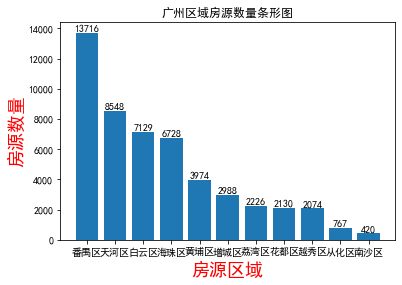

In [34]:
# 1.简单的条形图
fig = plt.figure()

plt.rcParams['font.sans-serif'] = ['SimHei']#SimHeri是中文字体名称
plt.rcParams['axes.unicode_minus'] = False

plt.title('广州区域房源数量条形图')
plt.xlabel('房源区域',fontsize=18,color='red')
plt.ylabel('房源数量',fontsize=18,color='red')

x = region_num.index.tolist()
y = region_num.values.tolist()

rects = plt.bar(x, y)

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+20, str(height), ha="center", va="bottom")

plt.show()

In [35]:
#求出各个区域的房价总和
panyu_num = df[df['region'] == '番禺区']['totalPrice'].sum()
tianhe_num = df[df['region'] == '天河区']['totalPrice'].sum()
baiyun_num = df[df['region'] == '白云区']['totalPrice'].sum()
haizhu_num = df[df['region'] == '海珠区']['totalPrice'].sum()
huangpu_num = df[df['region'] == '黄埔区']['totalPrice'].sum()
zengcheng_num = df[df['region'] == '增城区']['totalPrice'].sum()
liwan_num = df[df['region'] == '荔湾区']['totalPrice'].sum()
huadu_num = df[df['region'] == '花都区']['totalPrice'].sum()
yuexiu_num = df[df['region'] == '越秀区']['totalPrice'].sum()
conghua_num = df[df['region'] == '从化区']['totalPrice'].sum()
nansha_num = df[df['region'] == '南沙区']['totalPrice'].sum()

In [36]:
#求出各地区房价平均值
panyu_avg = int(panyu_num / region_num['番禺区'])
tianhe_avg = int(tianhe_num / region_num['天河区'])
baiyun_avg = int(baiyun_num / region_num['白云区'])
haizhu_avg = int(haizhu_num / region_num['海珠区'])
huangpu_avg = int(huangpu_num / region_num['黄埔区'])
zengcheng_avg = int(zengcheng_num / region_num['增城区'])
liwan_avg = int(liwan_num / region_num['荔湾区'])
huadu_avg = int(huadu_num / region_num['花都区'])
yuexiu_avg = int(yuexiu_num / region_num['越秀区'])
conghua_avg = int(conghua_num / region_num['从化区'])
nansha_avg = int(nansha_num / region_num['南沙区'])

## 查看各区域房源数量和房价对比

In [37]:
#查看区域房源和平均房价关系
x = region_num.index.tolist()
a = region_num.values.tolist()
b = [panyu_avg, tianhe_avg, baiyun_avg, haizhu_avg, huangpu_avg, zengcheng_avg, liwan_avg, huadu_avg, yuexiu_avg, conghua_avg, nansha_avg]
bar = (Bar()
      .add_xaxis(x)
      .add_yaxis('广州各区域房源数量', a))
line = (Line(init_opts=opts.InitOpts(theme = ThemeType.SHINE))
       .add_xaxis(x)
       .add_yaxis('广州各区域房源平均价格（万）', b, markline_opts=opts.MarkLineOpts(data = [opts.MarkLineItem(type_="average")]))
       .set_global_opts(title_opts=opts.TitleOpts(title="广州二手房区域平均价格情况",subtitle="测试")))

bar.overlap(line)
bar.render_notebook()

## 查看广州二手房分布区域图

In [38]:
#查看二手房源区域分布热力图
ah_data = data_region_pair
map_v = (Map()
        .add('地区', ah_data, "广州")
        .set_global_opts(
            title_opts=opts.TitleOpts(title="广州二手房源数量分布图"),
            visualmap_opts=opts.VisualMapOpts(max_=14000, is_piecewise=True),
        )
    )
map_v.render_notebook()

In [39]:
#载入整理的房源经纬度
data_house = pd.read_excel(r'./output.xlsx')

D:\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [40]:
#统计每个小区有多少房源
data_house_num = data_house['house_area'].value_counts()
data_house_num

广州海伦堡        498
翡翠绿洲森林半岛     418
南国奥林匹克花园     384
碧桂园凤凰城凤馨苑    353
晓港湾          350
            ... 
建设四马路          1
石鼓岭公安宿舍        1
华燊大厦           1
百好居            1
广纸路            1
Name: house_area, Length: 2383, dtype: int64

In [41]:
#转化为列表形式
data_house_pair = [list(z) for z in zip(data_house_num.index.tolist(), data_house_num.values.tolist())]
data_house_pair

[['广州海伦堡', 498],
 ['翡翠绿洲森林半岛', 418],
 ['南国奥林匹克花园', 384],
 ['碧桂园凤凰城凤馨苑', 353],
 ['晓港湾', 350],
 ['祈福辉煌台', 342],
 ['汇东国际花园', 334],
 ['锦绣生态园', 324],
 ['富力金港城东区', 313],
 ['锦绣新天地', 272],
 ['棠德花园', 266],
 ['富力桃园', 246],
 ['万科云城米酷', 241],
 ['实地常春藤', 234],
 ['敏捷锦绣天伦', 210],
 ['天马丽苑二期', 202],
 ['祈福新村青怡居', 200],
 ['碧桂园城市花园漫绿苑', 199],
 ['敏捷华美国际', 194],
 ['恒大山水城', 193],
 ['骏景花园', 190],
 ['萝岗敏捷广场', 184],
 ['宝铼雅居', 182],
 ['亚运城媒体南村', 178],
 ['保利大都汇', 176],
 ['保利东江首府', 176],
 ['祈福新村康怡居', 172],
 ['碧桂园凤凰城凤晴苑', 172],
 ['锐丰中心', 170],
 ['金碧花园第一金碧', 168],
 ['华南新城', 166],
 ['华侨城(番禺)', 162],
 ['豪利花园', 161],
 ['碧桂园凤凰城凤妍苑', 152],
 ['嘉骏豪苑', 151],
 ['祈福缤纷汇', 150],
 ['新都盛世名门宏城汇', 148],
 ['碧桂园凤凰城凤锦苑', 148],
 ['万科欧泊', 148],
 ['汇美体育花园', 146],
 ['碧桂园城市花园花岸苑', 142],
 ['大城云山', 142],
 ['奥园城市天地', 141],
 ['城市家园二期', 140],
 ['广州融创文旅城A1区', 139],
 ['新康花园', 138],
 ['东方名都', 135],
 ['橡树园', 130],
 ['金泽豪庭', 130],
 ['祈福万景峰祈福天龙苑', 128],
 ['富力金港城北区', 127],
 ['南沙万达广场', 127],
 ['人盛巴厘天地', 126],
 ['新塘新世界花园万象苑', 125],
 ['金城花园', 124],
 ['祈福

In [42]:
# 对数据进行处理，并将重复值去除，重置引索
data_house = data_house.drop_duplicates().reset_index(drop = True)
data_house

,house_area,longitude,latitude
0,中海誉城北苑,113.526037,23.161849
1,万科金色梦想,113.529519,23.163331
2,万科东荟城,113.503431,23.158912
3,荔港南湾,113.229254,23.135461
4,金碧花园第一金碧,113.288307,23.068938
...,...,...,...
2378,市桥富华楼,113.361206,22.947811
2379,加怡花园,113.292518,23.071152
2380,交易会宿舍(站前横路),113.249795,23.176128
2381,华仙楼,113.316985,23.166106


In [43]:
#增加一个新列，用于存放每个小区房源数量
data_house['sum'] = ''
data_house

,house_area,longitude,latitude,sum
0,中海誉城北苑,113.526037,23.161849,
1,万科金色梦想,113.529519,23.163331,
2,万科东荟城,113.503431,23.158912,
3,荔港南湾,113.229254,23.135461,
4,金碧花园第一金碧,113.288307,23.068938,
...,...,...,...,...
2378,市桥富华楼,113.361206,22.947811,
2379,加怡花园,113.292518,23.071152,
2380,交易会宿舍(站前横路),113.249795,23.176128,
2381,华仙楼,113.316985,23.166106,


In [44]:
#将每个小区房源数量存放到相应的sum列中
for i in range(len(data_house_pair)):
    for z in range(len(data_house)):
        if data_house_pair[i][0] == data_house['house_area'][z]:
            data_house.loc[z, 'sum'] = data_house_pair[i][1]
data_house

,house_area,longitude,latitude,sum
0,中海誉城北苑,113.526037,23.161849,46
1,万科金色梦想,113.529519,23.163331,57
2,万科东荟城,113.503431,23.158912,100
3,荔港南湾,113.229254,23.135461,53
4,金碧花园第一金碧,113.288307,23.068938,168
...,...,...,...,...
2378,市桥富华楼,113.361206,22.947811,2
2379,加怡花园,113.292518,23.071152,7
2380,交易会宿舍(站前横路),113.249795,23.176128,11
2381,华仙楼,113.316985,23.166106,2


In [ ]:
#显示广州小区分布图，根据小区经纬度生成数据。
geo = Geo().add_schema(maptype='广州')
geo.set_global_opts(title_opts=opts.TitleOpts(title="广州二手房源分布图"))
for i in range(len(data_house)):
    geo.add_coordinate(data_house['house_area'][i], data_house['longitude'][i], data_house['latitude'][i])
    data_pair = [(data_house['house_area'][i], data_house['sum'][i])]
    geo.add('',data_pair, type_=GeoType.EFFECT_SCATTER, symbol_size=20)    # 可尝试把''里面内容替换成data_house['house_area'][i],慎重。。
    geo.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    

geo.render_notebook()